# Linear Algebra II

In this set of notes, we'll consider singular value and eigenvalue problems.  

In [1]:
import numpy as np
import pandas as pd                   # for pagerank example
from matplotlib.image import imread   # for image compression
from matplotlib import pyplot as plt  # for image compression

## SVD

There are lots of circumstances in which we should compute the singular value decomposition (SVD) or eigenvalue decomposition of a matrix. SVD is somewhat more general. 

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Everybody knows that the <a href="https://twitter.com/hashtag/SVD?src=hash&amp;ref_src=twsrc%5Etfw">#SVD</a> is the <a href="https://twitter.com/hashtag/bestmatrixdecomposition?src=hash&amp;ref_src=twsrc%5Etfw">#bestmatrixdecomposition</a> !!!<br><br> <a href="https://twitter.com/hashtag/UDVt?src=hash&amp;ref_src=twsrc%5Etfw">#UDVt</a> <a href="https://twitter.com/hashtag/minimumreconstructionerror?src=hash&amp;ref_src=twsrc%5Etfw">#minimumreconstructionerror</a> <a href="https://twitter.com/hashtag/maximalvariance?src=hash&amp;ref_src=twsrc%5Etfw">#maximalvariance</a> <a href="https://twitter.com/hashtag/nonconvexbutstillsolvable?src=hash&amp;ref_src=twsrc%5Etfw">#nonconvexbutstillsolvable</a> <a href="https://twitter.com/hashtag/nothanksQR?src=hash&amp;ref_src=twsrc%5Etfw">#nothanksQR</a><a href="https://twitter.com/hashtag/seeyoulaterEigenDecomp?src=hash&amp;ref_src=twsrc%5Etfw">#seeyoulaterEigenDecomp</a><a href="https://twitter.com/hashtag/blessed?src=hash&amp;ref_src=twsrc%5Etfw">#blessed</a> <a href="https://t.co/je7Xetgfhr">https://t.co/je7Xetgfhr</a></p>&mdash; Dr. Daniela Witten (@daniela_witten) <a href="https://twitter.com/daniela_witten/status/1279915517654888448?ref_src=twsrc%5Etfw">July 5, 2020</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

As you may remember, a *[singular value decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition)* of a real matrix $\mathbf{A} \in \mathbb{R}^{m \times n}$ is 

$$\mathbf{A} = \mathbf{U}\mathbf{D}\mathbf{V}^T\;, $$

where $\mathbf{D} \in \mathbb{R}^{m \times n}$ has nonzero entries (the *singular values* $\sigma_i$) only along its diagonal, and where $\mathbf{U} \in \mathbb{R}^{m \times m}$ and $\mathbf{V} \in \mathbb{R}^{n \times n}$ are orthogonal matrices. The singular values $\sigma_i$ collectively give some measure of how "large" the matrix $\mathbf{A}$ is. 

Numpy makes it easy to compute the SVD of a matrix: 

In [2]:
A = np.random.randint(1, 5, size = (7, 5))
A

array([[4, 2, 1, 2, 2],
       [3, 4, 1, 2, 2],
       [2, 3, 3, 4, 4],
       [3, 2, 3, 1, 3],
       [2, 2, 1, 1, 4],
       [1, 1, 1, 1, 4],
       [3, 2, 2, 2, 1]])

In [3]:
U, sigma, V = np.linalg.svd(A)

In [4]:
sigma # singular values

array([13.81539265,  3.72603666,  2.44819628,  2.09949877,  1.36015318])

We can use the components of the SVD to reconstruct the original matrix $\mathbf{A}$. 

In [5]:
D = np.zeros_like(A,dtype=float) # matrix of zeros of same shape as A
D[:5,:5] = np.diag(sigma)
D

array([[13.81539265,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  3.72603666,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  2.44819628,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  2.09949877,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.36015318],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [6]:
U @ D @ V # == A up to numerical precision

array([[4., 2., 1., 2., 2.],
       [3., 4., 1., 2., 2.],
       [2., 3., 3., 4., 4.],
       [3., 2., 3., 1., 3.],
       [2., 2., 1., 1., 4.],
       [1., 1., 1., 1., 4.],
       [3., 2., 2., 2., 1.]])

In [7]:
# low-rank approximation of A
D = np.zeros_like(A,dtype=float) # matrix of zeros of same shape as A
D[:2,:2] = np.diag(sigma[:2])
D

array([[13.81539265,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  3.72603666,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [8]:
U @ D @ V # close to A, using only two singular vectors

array([[3.2096557 , 2.65898671, 1.68173466, 2.08466542, 1.67933816],
       [3.42226876, 2.85044822, 1.82194842, 2.24275516, 1.88861276],
       [3.0260681 , 2.95788871, 2.43342142, 2.55390929, 4.46809998],
       [2.57181111, 2.39956408, 1.85323727, 2.02138112, 3.06622612],
       [1.58786939, 1.76571022, 1.67849578, 1.61885415, 3.71096771],
       [0.68832846, 1.11390247, 1.38277045, 1.15648122, 3.83777171],
       [2.98553926, 2.40609154, 1.43791263, 1.85137671, 1.13203631]])

## Application: Image Compression



To illustrate the power of SVD, let's use it to *compress images*. In general, storing an image with $m \times n$ greyscale pixels requires storing $m \times n$ numbers, which can be quite expensive when $m$ or $n$ are large! SVD can be used to compress images by treating them as matrices and discarding the small singular values. Let's see an example! 

We will use an image of Maru. Maru is a Cat On The Internet who is famous for doing stuff like this: 

![](https://media2.giphy.com/media/9NAXEP3RiJjm8/giphy.webp?cid=ecf05e47dbjp1upvg5ovlw54yn1j9zrhaa73vg4x5m4er4ow&rid=giphy.webp&ct=g)

(-0.5, 639.5, 412.5, -0.5)

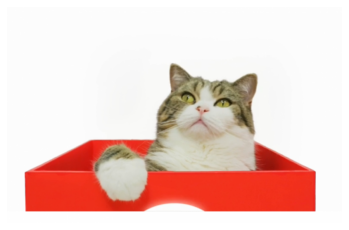

In [9]:
maru = imread("https://i.pinimg.com/originals/0e/d0/23/0ed023847cad0d652d6371c3e53d1482.png")
plt.imshow(maru)
plt.gca().axis("off")

Basic SVD for images only works on greyscale images -- there are ways to use SVD for color images, but this is beyond scope for today. The following simple function will convert the base image to greyscale: 

In [10]:
def to_greyscale(im):
    return 1 - np.dot(im[...,:3], [0.2989, 0.5870, 0.1140])

(-0.5, 639.5, 412.5, -0.5)

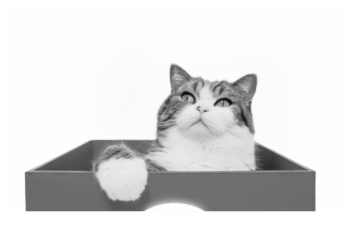

In [11]:
grey_maru = to_greyscale(maru)
plt.imshow(grey_maru, cmap = "Greys")
plt.gca().axis("off")

Now we can write a function that encapsulates the steps we did in the previous section to compress the matrix, keeping only the top $k$ singular values in order to reconstruct the target matrix. 

In [12]:
def reconstruct(gs, k):
    U, sigma, V = np.linalg.svd(gs)
    D = np.zeros_like(gs,dtype=float) # matrix of zeros of same shape as A
    D[:k,:k] = np.diag(sigma[:k])
    return U @ D @ V

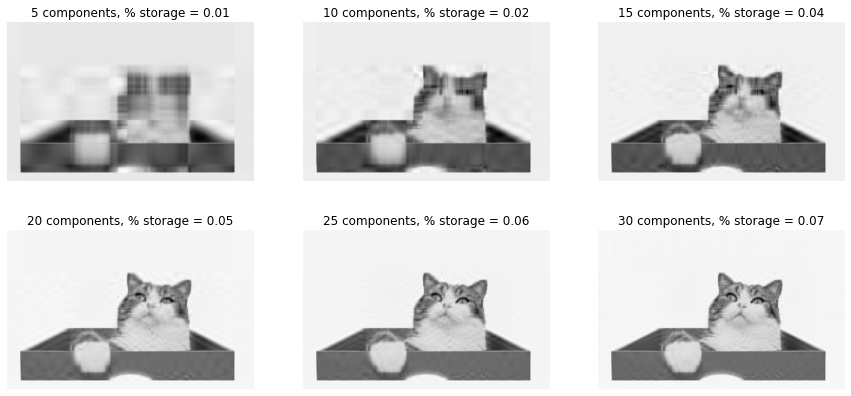

In [24]:
fig, axarr = plt.subplots(2, 3, figsize = (15, 7))

for i in range(6):
    row = i // 3
    col = i % 3
    
    n_components = (i+1)*5
    
    axarr[row, col].imshow(reconstruct(grey_maru, n_components), cmap = "Greys") 
    axarr[row, col].set(title = f"{n_components} components, % storage = {np.round(n_components / np.min(grey_maru.shape),2)}")
    axarr[row, col].axis("off")

# plt.imshow(reconstruct(gs,20), cmap = "Greys")

We can make a relatively clear picture with just 7% of the storage requirement! 

### Eigenvalue-Eigenvector Decomposition

As you may remember, the eigenvalue-eigenvector decomposition for a matrix is related to the SVD. Eigenvalue-eigenvector decompositions are especially relevant in the case of symmetric matrices. 

> **Spectral Theorem for Symmetric Matrices**: if $\mathbf{A} \in \mathbb{R}^{n \times n}$ is a real symmetric matrix, then there exists a real diagonal matrix $\Lambda \in \mathbb{R}^{n \times n} $ and orthogonal matrix $\mathbf{U} \in \mathbb{R}^{n \times n}$ such that $\mathbf{A} = \mathbf{U} \Lambda\mathbf{U}^T$. 

This theorem ensures that a real symmetric matrix $\mathbf{A}$ possesses a full complement of *eigenvalue-eigenvector pairs* $(\lambda, \mathbf{u})$ which satisfy the equation 

$$\mathbf{A}\mathbf{u} = \lambda \mathbf{u}\;.$$

Numpy gives us a convenient function with which to calculate the eigenvalues and eigenvectors: 

In [14]:
A = np.random.randint(1, 5, size = (5, 5))
A = (A + A.T)/2 # symmetric version
Lam, U = np.linalg.eig(A)

The first array gives the eigenvalues of $\mathbf{A}$, while the second array gives the eigenvectors (as columns). We can check the eigenvalue-eigenvector condition above:  

In [15]:
k = 0
np.allclose(A @ U[:,k], Lam[k] * U[:,k])

True

In many cases, it's useful to get the eigenvectors corresponding to the largest or smallest eigenvalues of a matrix. This can be done via sorting: 

In [16]:
Lam, U

(array([13.68905209, -1.78600902, -0.30640512,  1.83340778,  1.56995427]),
 array([[-0.43856823, -0.17597506,  0.02785015,  0.88085129,  0.00400728],
        [-0.48057741,  0.04276079,  0.44893646, -0.24168668, -0.7122222 ],
        [-0.45277844, -0.52913012,  0.27873659, -0.34252959,  0.5656787 ],
        [-0.38084075,  0.82801568,  0.12008095, -0.02977984,  0.3924845 ],
        [-0.47608326, -0.04019507, -0.8399803 , -0.21788803, -0.13670041]]))

In [17]:
# eigenvector with second-smallest eigenvalue
# spoiler, you're going to need this one soon!

ix = Lam.argsort()

Lam, U = Lam[ix], U[:,ix]

# 2nd smallest eigenvalue and corresponding eigenvector
Lam[1], U[:,1]

(-0.30640511777428914,
 array([ 0.02785015,  0.44893646,  0.27873659,  0.12008095, -0.8399803 ]))

## Application: PageRank

The *PageRank score* provides a way to estimate the importance of entities in a network. Historically, PageRank was the algorithm used by Google to rank webpages: pages with higher PageRanks would appear higher in search results. 

Let's continue with the webpage example for a bit. PageRank works by allowing a "random surfer" to move around webpages by following links. Each time the surfer lands on a page, it then looks for all the links on that page. It then picks one at random and follows it, thereby arriving at the next page, where the process repeats. Because the surfer moves between linked pages, PageRank expresses an intuitive idea: **important pages are linked to other important pages.** [This diagram](https://en.wikipedia.org/wiki/PageRank#/media/File:PageRanks-Example.jpg) from Wikipedia gives a nice illustration. Note that more important webpages (higher PageRank) tend to be connected to other important webpages. 

<figure class="image" style="width:50%">
  <img src="https://upload.wikimedia.org/wikipedia/en/thumb/8/8b/PageRanks-Example.jpg/1920px-PageRanks-Example.jpg
" alt="A set of 11 circles, with arrows between them. Some of the circles are larger than others, reflecting their high PageRank score. Large circles tend to be linked to other large circles by arrows." width="300px">
  <figcaption><i>A schematic for PageRank. </i></figcaption>
</figure>

PageRank can be estimated via random walks, and you may even have done this in PIC16A. However, the most efficient way to compute PageRank for small-to-medium-sized data is by computing eigenvectors of matrices. (The spectral theorem above does not apply because the relevant matrix is not symmetric, but this turns out not to be a problem). Let's take a look. 

Our data for this example comes from the hit Broadway musical "Hamilton."

<figure class="image" style="width:20%">
  <img src="https://upload.wikimedia.org/wikipedia/en/8/83/Hamilton-poster.jpg" alt="The logo of the musical Hamilton, showing a silhouette dressed in period custom standing on top of a five-pointed star." width="300px">
  <figcaption><i>The Hamilton data set</i></figcaption>
</figure>

The good folks at [The Hamilton Project](http://hamilton.newtfire.org/) analyzed the script for us, obtaining data on **who talks about whom** in each of the show's songs. When character A mentions character B, we'll think of this as a *link* from A to B, suggesting that B might be important. First we'll grab data: 

In [18]:
url = "https://philchodrow.github.io/PIC16A/homework/HW3-hamilton-data.csv"
df = pd.read_csv(url, names = ["source", "target"])
df.head()

,source,target
0,burr,hamilton
1,burr,weeks
2,burr,madison
3,burr,jay
4,burr,theodosiaDaughter


Now we construct the matrix of directed links: 

In [19]:
# construct matrix of directed links 
# A[i,j] is the number of times that i mentions j

N = np.unique(np.concatenate((df.source, df.target))) # get all unique nodes

n = len(N)

name_to_ix = {N[i] : i for i in range(n)}

A = np.zeros((n, n))

for row in df.iterrows():
    ix_i = name_to_ix[row[1].source]
    ix_j = name_to_ix[row[1].target]
    A[ix_i, ix_j] += 1

From this we construct the so-called PageRank matrix. 

In [20]:
# form the PageRank matrix

# normalized adjacency matrix, corresponding to the transition
# of a random walk
D_inv = np.diag(1/A.sum(axis = 1))
D_inv[np.isinf(D_inv)] = 0
M = np.dot(A, D_inv)

# teleportation parameter
a = 0.15

# 
P = (1-a)*M + a*np.ones((n, n))

<ipython-input-20-fb836e0cad41>:5: RuntimeWarning: divide by zero encountered in true_divide
  D_inv = np.diag(1/A.sum(axis = 1))


The leading eigenvector of the PageRank matrix is guaranteed to be real and positive with eigenvalue 1.0 (from the theory of Markov chains). We single this one out -- it's the one we want! 

In [25]:
eigs = np.linalg.eig(M)
s = np.real(eigs[1][:,eigs[0] == 1.0])

Now let's make a nice display: 

In [26]:
# display as a sorted data frame
ranks = pd.DataFrame({
    "character" : [N[i] for i in range(len(N))],
    "PageRank"  : [s[i][0] for i in range(len(N))]
})
ranks.sort_values("PageRank", ascending = False).head()

,character,PageRank
14,hamilton,0.815778
3,burr,0.381702
17,jefferson,0.238992
4,company,0.206834
43,washington,0.160793


Through Power of Linear Algebra, we have discovered that Alexander Hamilton is the main character of the musical *Hamilton*. 